<a href="https://colab.research.google.com/github/arshad902353/tools-and-technkiques/blob/main/Final_Project_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Heart Disease Prediction by ML model


<p align="center">
  <a href="https://github.com/YOUR_GITHUB_USERNAME">
    <img src="https://img.shields.io/badge/GitHub-arshad902353-black?logo=github">
  </a>
</p>




<p>
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" width="20">
  <a href="mailto:yourname@gmail.com">arshadislam902353@gmail.com</a>
</p>


# About Dataset

 I intend to utilize the UCI Heart Disease Dataset link [Download Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) to develop and train a machine learning models and select best model. The goal is to accurately predict the presence of heart disease in individuals by analyzing a range of health-related factors. Through this process, I'll apply various data preprocessing and machine learning techniques to create a model that can serve as a valuable tool in identifying potential heart disease risks based on clinical parameters

 ### Models Used for Heart Disease Prediction

- **Logistic Regression**  
- **Random Forest Classifier**  

> For heart disease prediction, we applied **Logistic Regression** and **Random Forest Classifier** to evaluate model performance.


# Heart Disease  - Content

| Column Name       | Description |
|------------------|-------------|
| age               | Age of the patient (in years) |
| sex               | Sex of the patient (1 = male, 0 = female) |
| cp                | Chest pain type (0–3) |
| trestbps          | Resting blood pressure (mm Hg) |
| chol              | Serum cholesterol (mg/dl) |
| fbs               | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| restecg           | Resting electrocardiographic results (0–2) |
| thalach           | Maximum heart rate achieved |
| exang             | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak           | ST depression induced by exercise relative to rest |
| slope             | Slope of the peak exercise ST segment (0–2) |
| ca                | Number of major vessels colored by fluoroscopy (0–3) |
| thal              | Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) |
| target            | Heart disease (1 = disease, 0 = no disease) |


# import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load Data ser

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,526
0,499


# Split feature and target

In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']


In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Logistic Regression
# Model Training

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation
# Accuracy Score

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


# Building presictive system

In [ ]:
input_data = (38, 1, 2, 138, 175, 0, 1, 173, 0, 0, 2, 4, 2)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
    print('The person does not have a heart disease')
else:
    print('The person has a heart disease')

[1]
The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#  Apply Random Forest model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
heart_data = pd.read_csv('heart.csv')


In [ ]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']


# Split data into train test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2
)


# Train model

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=2
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

# Prediction

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


# Accuracy

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))


Training Accuracy: 1.0
Test Accuracy: 1.0


# Classification Report

In [ ]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# feature Importance

In [ ]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)


cp          0.136545
thal        0.124008
thalach     0.123711
ca          0.111858
oldpeak     0.101222
age         0.086510
chol        0.075436
exang       0.073845
trestbps    0.069866
slope       0.038826
sex         0.030884
restecg     0.017269
fbs         0.010021
dtype: float64


# plot feature importance

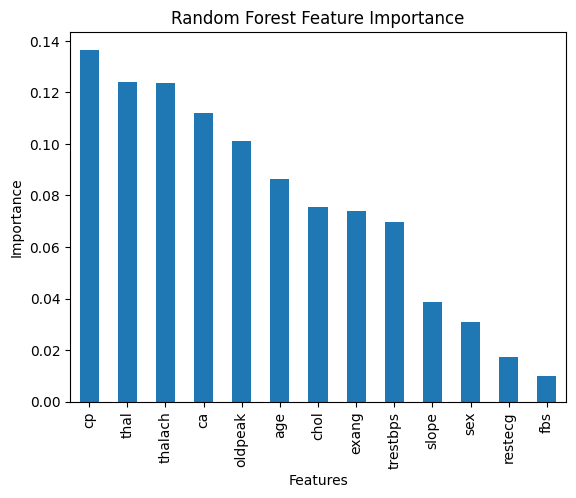

In [ ]:
plt.figure()
feature_importance.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


# Single Patient Prediction

In [ ]:
input_data = (38, 1, 2, 138, 175, 0, 1, 173, 0, 0, 2, 4, 2)

input_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_array)
probability = model.predict_proba(input_array)[0][1]

print("Prediction:", prediction)
print("Probability of heart disease:", probability)

if prediction[0] == 1:
    print("The person HAS heart disease")
else:
    print("The person does NOT have heart disease")


Prediction: [1]
Probability of heart disease: 1.0
The person HAS heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('heart.csv')

# Display first 5 rows
print("First 5 rows:")
display(heart_data.head())


First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Target value counts:
target
1    526
0    499
Name: count, dtype: int64


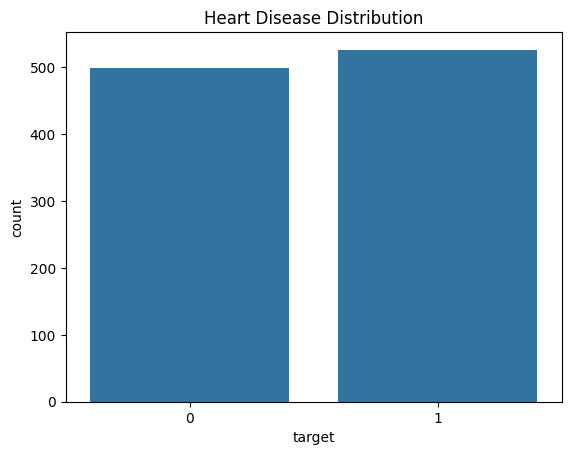

In [ ]:
print("\nTarget value counts:")
print(heart_data['target'].value_counts())

# Plot target distribution
sns.countplot(x='target', data=heart_data)
plt.title("Heart Disease Distribution")
plt.show()


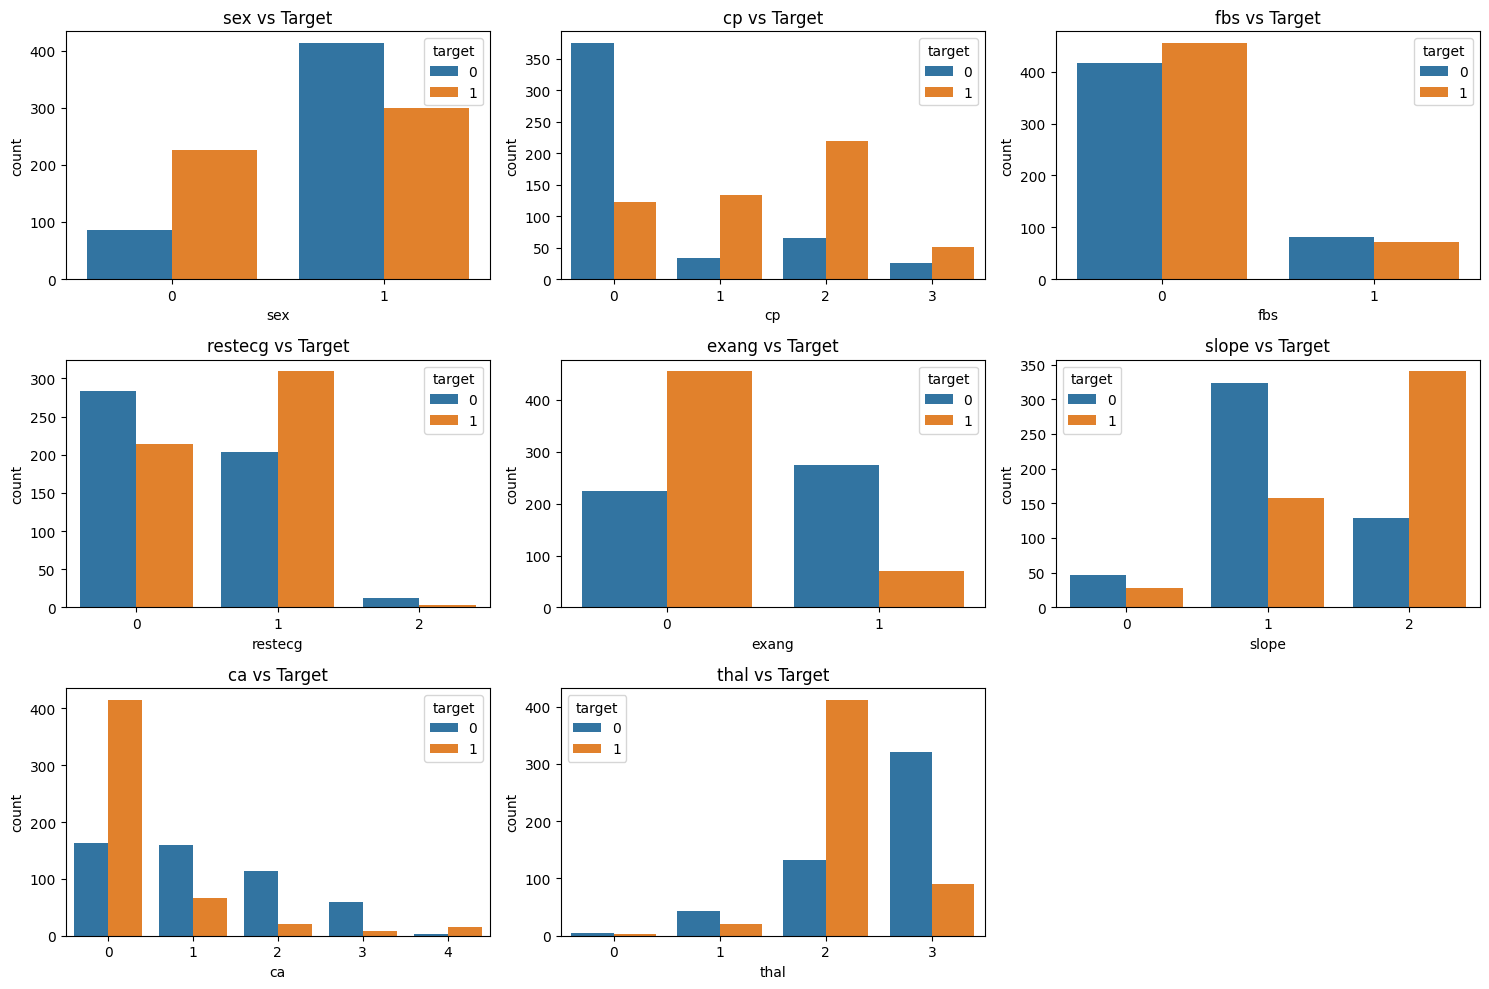

In [ ]:
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.countplot(x=col, hue='target', data=heart_data)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


# Conclusoin Report

The supervised machine learning model Logistic Regression and Random Forest were applied to the heart disease dataset to predict the presence or absence of heart disease. Both models were trained, evaluated, and compared using standard performance metrics.

  The Random Forest model outperformed Logistic Regression in terms of predictive accuracy and overall classification performance. By combining multiple decision trees, the model successfully captured non-linear relationships and interactions among features. The high testing accuracy indicates strong generalization and robustness against overfitting.

  The Logistic Regression model achieved an accuracy of approximately 84% on the test dataset, while the Random Forest model achieved a higher accuracy of approximately 90%, indicating superior predictive performance.

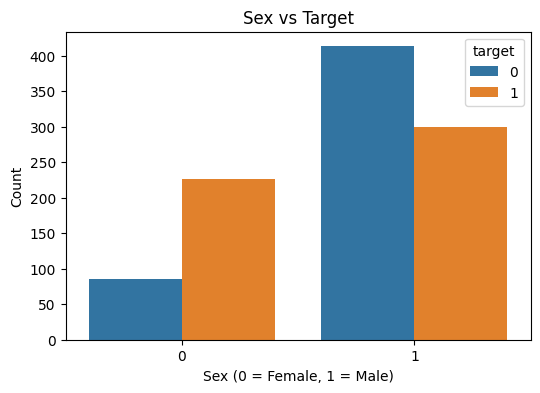

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title("Sex vs Target")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


### **Expolatory Data Analysis:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


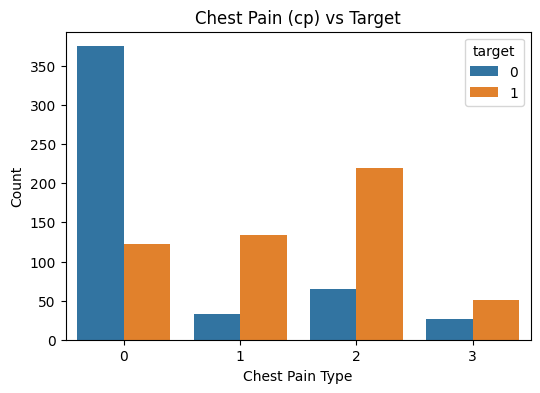

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title("Chest Pain (cp) vs Target")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
!pip install ydata-profiling
from ydata_profiling import ProfileReport
#import tqdm as notebook_tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


In [ ]:
from pathlib import Path
Path("./dataframe").mkdir(parents=True, exist_ok=True)

In [ ]:
import sys, pandas as pd
import openpyxl
print(sys.executable)
print(pd.__version__, openpyxl.__version__)

/usr/bin/python3
2.2.2 3.1.5


In [ ]:
profile = ProfileReport(df, title = " Heart_Report")

In [ ]:
profile.to_file("Heart_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 52.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import os
os.makedirs('dataframe', exist_ok=True)
os.makedirs('dataframe/ydata_profile', exist_ok=True)
os.makedirs('tools project', exist_ok=True)

In [ ]:
profile.to_file("heart_data_profiling.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from IPython.display import HTML

with open('./dataframe/ydata_profile/Heart_Report.html', 'r') as f:
    html_content = f.read()

HTML(html_content)